# Starting machine learning

In [1]:
import pandas as pd
df = pd.read_csv(r'./TempFiles/RealEstate_PARIS_FR_2022.csv')

In [2]:
df.head()

,Nature mutation,Valeur fonciere,Type local,Nombre pieces principales,Surface,Latitude,Longitude
0,Vente,580000.0,Appartement,2,81.00,48.884552,2.348164
1,Vente,580000.0,Appartement,2,86.00,48.884552,2.348164
2,Vente,605000.0,Appartement,3,82.66,48.863303,2.362994
3,Vente,716250.0,Appartement,3,135.26,48.880446,2.332356
4,Vente,320000.0,Appartement,2,68.19,48.879574,2.362449


In [3]:
target_column = 'Valeur fonciere'
X = df.drop(columns=target_column, axis=1)
Y = df.loc[:,target_column]

In [4]:
df.dtypes

Nature mutation               object
Valeur fonciere              float64
Type local                    object
Nombre pieces principales      int64
Surface                      float64
Latitude                     float64
Longitude                    float64
dtype: object

In [5]:
categorical_features=pd.Index(['Nature mutation', 'Type local'], dtype='object')
numeric_features = pd.Index(['Nombre pieces principales', 'Surface', 'Latitude', 'Longitude'], dtype='object')

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
# numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())])
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", MinMaxScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                          ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])
preprocessor = ColumnTransformer(sparse_threshold=0, 
    transformers=[
       ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
X_train

,Nature mutation,Type local,Nombre pieces principales,Surface,Latitude,Longitude
11705,Vente,Appartement,2,95.59,48.849383,2.269105
1413,Vente,Appartement,2,216.00,48.886468,2.352755
8918,Vente,Appartement,1,61.51,48.872268,2.381636
16916,Vente,Appartement,2,82.40,48.848190,2.354203
17615,Vente,Appartement,2,125.88,48.872210,2.286157
...,...,...,...,...,...,...
9225,Vente,Maison,3,50.00,48.853395,2.268522
13123,Vente,Appartement,6,210.00,48.852230,2.300252
9845,Vente,Appartement,2,95.03,48.854917,2.374866
10799,Vente,Appartement,6,202.00,48.846728,2.340974


In [8]:
X_train = preprocessor.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=preprocessor.get_feature_names_out())
X_test = preprocessor.transform(X_test)

In [9]:
# Displaying transformed data before training !
X_train

,num__Nombre pieces principales,num__Surface,num__Latitude,num__Longitude,cat__Nature mutation_Vente en l'état futur d'achèvement,cat__Nature mutation_Vente terrain à bâtir,cat__Type local_Maison
0,0.166667,0.358263,0.980794,0.257069,0.0,0.0,0.0
1,0.166667,0.829259,0.995142,0.264148,0.0,0.0,0.0
2,0.000000,0.224956,0.989648,0.266592,0.0,0.0,0.0
3,0.166667,0.306669,0.980332,0.264270,0.0,0.0,0.0
4,0.166667,0.476746,0.989626,0.258512,0.0,0.0,0.0
...,...,...,...,...,...,...,...
14692,0.333333,0.179934,0.982346,0.257019,0.0,0.0,1.0
14693,0.833333,0.805789,0.981895,0.259705,0.0,0.0,0.0
14694,0.166667,0.356073,0.982935,0.266019,0.0,0.0,0.0
14695,0.833333,0.774496,0.979766,0.263151,0.0,0.0,0.0


In [10]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score

In [11]:
regressor = XGBRegressor(n_jobs=-1)
regressor.fit(X_train, Y_train)
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)
print("R² score on train set : ", r2_score(Y_train, Y_train_pred))
print("R² score on test set : ", r2_score(Y_test, Y_test_pred))

R² score on train set :  0.9966643546134247
R² score on test set :  0.9842023293618193


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

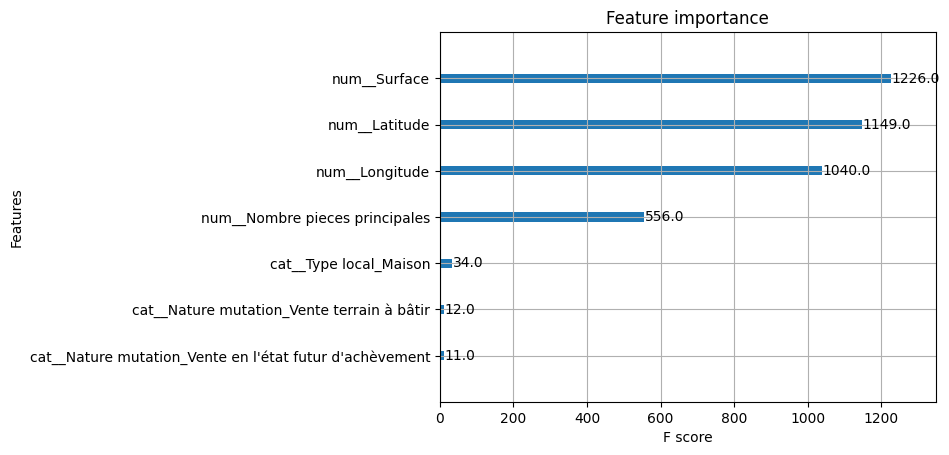

In [12]:
import xgboost
xgboost.plot_importance(regressor)

# Saving model and preprocessor to be used by streamlit app to predict values

In [13]:
regressor.save_model('./ModelFiles/RealEstate_PARIS_FR_2022.xgbmodel')

In [14]:
from pickle import dump
dump(preprocessor, open('./ModelFiles/preprocessor.dmp', 'wb'))